In [18]:

import pandas as pd
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [19]:

#.opening price--->the opening price is the value that each share has the opening price gives a good indication of where 
#the stock the stock will move during the day.
#2.closing price:--->an adjusted price is a stocks closing price on any given day of trading that has been amended to include
# any distibutions and corporate actions that occured at any time prior to the next days open.
#3.Volume--->volume is defined as "the number of shares or contracts traded in a security or an entire market during a given 
# period of time"
dataset=pd.read_csv('Amazon (1).csv')

In [20]:
#head means we take four rows from top of the dataset
dataset.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
5,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
6,1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
7,1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600
8,1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
9,1997-05-29,1.541667,1.541667,1.479167,1.505208,1.505208,3472800


In [21]:
#here we take tail() means take rows and columns from last of the data
dataset.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
5832,2020-07-20,3000.199951,3201.360107,2994.020020,3196.840088,3196.840088,7598200
5833,2020-07-21,3232.489990,3240.580078,3105.719971,3138.290039,3138.290039,6135000
5834,2020-07-22,3125.000000,3150.000000,3065.260010,3099.909912,3099.909912,4104200
5835,2020-07-23,3098.270020,3098.270020,2970.000000,2986.550049,2986.550049,5656900
5836,2020-07-24,2930.000000,3031.580078,2888.000000,3008.909912,3008.909912,5632400
5837,2020-07-27,3062.000000,3098.000000,3015.770020,3055.209961,3055.209961,4170500
5838,2020-07-28,3054.270020,3077.090088,2995.760010,3000.330078,3000.330078,3126700
5839,2020-07-29,3030.989990,3039.159912,2996.770020,3033.530029,3033.530029,2974100
5840,2020-07-30,3014.000000,3092.000000,3005.000000,3051.879883,3051.879883,6128300
5841,2020-07-31,3244.000000,3246.820068,3151.000000,3164.679932,3164.679932,8085500


In [22]:

dataset['Date']=pd.to_datetime(dataset.Date)
dataset.shape

(5842, 7)

In [23]:
#here we take drop a columns ..name Adjclose,,we use axis=1 use for column, and axis =0 for row
dataset.drop('Adj Close',axis=1,inplace=True)

In [24]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200


In [25]:
#here we check null value in any column..basically clean our data
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [26]:
#again here we check is there any na value in column
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [27]:
#here we take information of our data---we have  6features and no null  value
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5842 non-null   datetime64[ns]
 1   Open    5842 non-null   float64       
 2   High    5842 non-null   float64       
 3   Low     5842 non-null   float64       
 4   Close   5842 non-null   float64       
 5   Volume  5842 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 274.0 KB


In [28]:
dataset.describe()

,Open,High,Low,Close,Volume
count,5842.000000,5842.000000,5842.000000,5842.000000,5.842000e+03
mean,372.707174,376.921392,368.114569,372.746660,7.519048e+06
std,585.571802,591.766458,578.660700,585.607655,7.282683e+06
min,1.406250,1.447917,1.312500,1.395833,4.872000e+05
25%,37.955001,38.547501,37.207500,37.927499,3.684900e+06
50%,83.428749,84.945000,81.656250,83.459999,5.657200e+06
75%,359.729988,363.439987,356.280006,360.047501,8.533400e+06
max,3251.060059,3344.290039,3151.000000,3200.000000,1.043292e+08


In [29]:
#here we print the length of the dataset
print(len(dataset))

5842


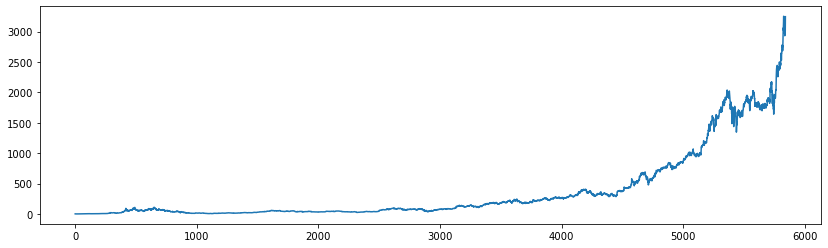

In [30]:
#here we plot a grapgh of open feature fron our dataset
dataset['Open'].plot(figsize=(14,4))
plt.show()


In [31]:
#here we divide features of our dataset in to independent and dependent variable
X=dataset[['Open','High','Low','Volume']]
Y=dataset['Close']

In [32]:
#here split our data into traing and testing (here we train out model using linear regression)
from sklearn.model_selection import train_test_split


In [50]:
#here we train our 80 % percent data for training and 20% data for testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [51]:
#check the size of our training dataset
X_train.shape

(4673, 4)

In [52]:
#check the shape of our testing dataset
X_test.shape

(1169, 4)

In [53]:
#here we use library sklearn beacause we want to import Linear regression ,and metrix and accuracy score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [54]:
from sklearn import metrics

In [55]:
reg=LinearRegression()

In [56]:
#here fit data for training and testing 
reg.fit(X_train,Y_train)

LinearRegression()

In [57]:
print(reg.coef_)

[-6.54284793e-01  8.59150886e-01  7.95418478e-01 -2.25962260e-09]


In [58]:
#here we want to print interception 
print(reg.intercept_)

-0.0162771023532855


In [59]:
#here we predict the value for testing data
predicted=reg.predict(X_test)

In [60]:
print(X_test)

            Open        High         Low    Volume
4176  389.230011  396.299988  383.100006   3489100
1042   14.490000   14.500000   14.000000   2701100
4642  602.299988  609.849976  596.289978   4269700
1043   14.280000   15.450000   14.200000  12083200
3124   96.220001   97.820000   96.019997   5556800
...          ...         ...         ...       ...
743    53.312500   57.437500   52.453125  12006400
4571  465.500000  475.880005  464.799988   4095600
1932   41.709999   43.959999   41.639999  12830600
363    17.937500   19.645834   17.895834  26695200
284    16.968750   19.083334   16.791666  28254600

[1169 rows x 4 columns]


In [61]:
#here we check the shape of the predicted dataset
predicted.shape

(1169,)

In [62]:
#here we create a another dataframe for predicted value
dataframe=pd.DataFrame(Y_test,predicted)

In [63]:
#here we create a another dataframe to check actual and predicted result
dataframe=pd.DataFrame({'Actual':Y_test,'predicted':predicted})

In [64]:
print(dataframe)

          Actual   predicted
4176  395.959991  390.514871
1042   14.130000   14.090579
4642  608.609985  604.151566
1043   15.270000   15.182056
3124   97.459999   97.434102
...          ...         ...
743    53.500000   56.144699
4571  475.480011  473.968124
1932   42.360001   43.554010
363    19.114584   19.300581
284    19.020834   18.569348

[1169 rows x 2 columns]


In [65]:
dataframe.head(30)

,Actual,predicted
4176,395.959991,390.514871
1042,14.130000,14.090579
4642,608.609985,604.151566
1043,15.270000,15.182056
3124,97.459999,97.434102
5400,1538.880005,1534.112249
3812,225.050003,224.669658
4593,535.219971,534.502861
778,46.312500,46.452251
1182,14.220000,14.242184


In [66]:
dataframe.tail(25)

,Actual,predicted
5837,3055.209961,3057.002910
450,66.500000,66.157926
2103,42.189999,42.182929
1463,23.360001,23.219087
1287,16.250000,16.009053
1730,44.740002,44.506287
2907,45.209999,44.946578
4485,370.579987,369.875816
1019,16.690001,16.903324
529,58.750000,61.609213


In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [68]:
#this is the regressor score and called accuracy
reg.score(X_test,Y_test)

0.9999345090928939

In [69]:
#here we import math library to check the mean absolute and Squared error
import math

In [70]:
print('Mean absolute error:',metrics.mean_absolute_error(Y_test,predicted))

print('Root mean Squared Error:',math.sqrt(metrics.mean_squared_error(Y_test,predicted)))

Mean absolute error: 2.0397642265759557
Root mean Squared Error: 4.823015162374082


In [71]:
graph=dataframe.head(25)

<AxesSubplot:>

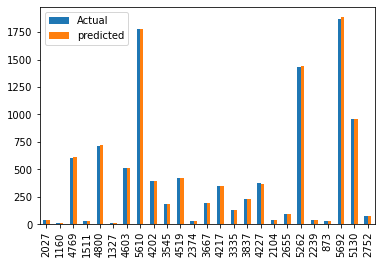

In [39]:
#this is the grapgh between actual and predicted value
graph.plot(kind='bar')